Importação de Bibliotecas

In [3]:
# Análise exploratória de dados de campeonatos de futebol
# Desenvolvido por: perrijuanso
# Data: 2025-04-20

# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore



Carregamento e Inspeção Inicial dos Dados

In [4]:
# Carregando o conjunto de dados
campeonatos = pd.read_csv("/content/campeonatos_futebol_atualizacao sem limpezacsv.csv")

# Visualizando as primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
display(campeonatos.head())

# Verificando informações gerais sobre o dataset
print("\nInformações sobre o dataset:")
display(campeonatos.info())

# Verificando dimensões do dataset
print(f"\nDimensões do dataset: {campeonatos.shape[0]} linhas e {campeonatos.shape[1]} colunas")

print("\nVerificação inicial dos dados concluída!")

Primeiras 5 linhas do dataset:


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1



Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzam

None


Dimensões do dataset: 27716 linhas e 40 colunas

Verificação inicial dos dados concluída!


 Análise de Valores Faltantes

Colunas com valores faltantes:


Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cruzamentos 1', 'Cruzamentos 2', 'Laterais 1',
       'Laterais 2', 'Chutes bloqueados 1', 'Chutes bloqueados 2',
       'Contra-ataques 1', 'Contra-ataques 2', 'Tiro de meta 1',
       'Tiro de meta 2', 'Tratamentos 1', 'Tratamentos 2', 'Substituições 1',
       'Substituições 2', 'Tiros-livres 1', 'Tiros-livres 2',
       'Defesas difíceis 1', 'Defesas difíceis 2', 'Posse 1(%)', 'Posse 2(%)',
       'Position 1', 'Position 2'],
      dtype='object')


Porcentagem de valores faltantes por coluna:


,Valores Faltantes,Porcentagem (%)
Tratamentos 1,22697,81.891326
Tratamentos 2,22697,81.891326
Defesas difíceis 2,21520,77.644682
Defesas difíceis 1,21520,77.644682
Tiros-livres 2,21470,77.464281
Tiros-livres 1,21470,77.464281
Contra-ataques 2,21453,77.402944
Contra-ataques 1,21453,77.402944
Chutes bloqueados 2,18873,68.094242
Chutes bloqueados 1,18873,68.094242


<ipython-input-5-29025d6d0836>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faltantes_df.index, y='Porcentagem (%)', data=faltantes_df, palette='viridis')


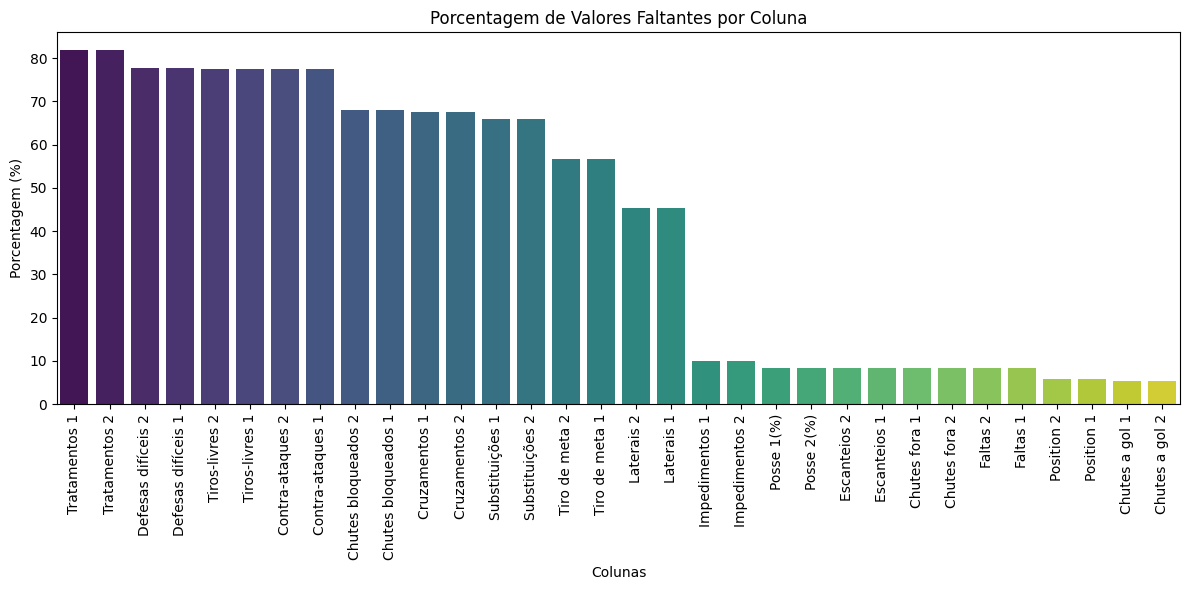

Análise de valores faltantes concluída!


In [5]:
# Identificando colunas com valores faltantes
colunas_com_null = campeonatos.columns[campeonatos.isnull().any()]
print("Colunas com valores faltantes:")
display(colunas_com_null)

# Calculando porcentagem de valores faltantes por coluna
valores_faltantes = campeonatos.isnull().sum()
porcentagem_faltantes = (valores_faltantes / len(campeonatos)) * 100
faltantes_df = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentagem (%)': porcentagem_faltantes
})
faltantes_df = faltantes_df[faltantes_df['Valores Faltantes'] > 0].sort_values('Porcentagem (%)', ascending=False)

print("\nPorcentagem de valores faltantes por coluna:")
display(faltantes_df)

# Visualização gráfica de valores faltantes
plt.figure(figsize=(12, 6))
sns.barplot(x=faltantes_df.index, y='Porcentagem (%)', data=faltantes_df, palette='viridis')
plt.title('Porcentagem de Valores Faltantes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Análise de valores faltantes concluída!")

Estatísticas Descritivas e Análise de Distribuição

Estatísticas descritivas (ordenadas por variabilidade):


,count,mean,std,min,25%,50%,75%,max,CV (%)
Cartões vermelhos 1,27716.0,0.049610,0.225298,0.0,0.0,0.0,0.0,3.0,454.13
Cartões vermelhos 2,27716.0,0.058594,0.247436,0.0,0.0,0.0,0.0,4.0,422.29
Contra-ataques 2,6263.0,1.156634,1.404204,0.0,0.0,1.0,2.0,15.0,121.40
Tratamentos 1,5019.0,1.995617,2.258323,0.0,0.0,1.0,3.0,17.0,113.16
Contra-ataques 1,6263.0,1.322689,1.490460,0.0,0.0,1.0,2.0,16.0,112.68
Chutes fora 2,25392.0,4.956758,5.451316,0.0,3.0,5.0,7.0,748.0,109.98
Tratamentos 2,5019.0,2.134489,2.296141,0.0,0.0,2.0,3.0,16.0,107.57
Gols 2,27716.0,1.173402,1.140984,0.0,0.0,1.0,2.0,9.0,97.24
Impedimentos 2,24942.0,1.968527,1.681298,0.0,1.0,2.0,3.0,15.0,85.41
Chutes bloqueados 2,8843.0,1.930001,1.644897,0.0,1.0,2.0,3.0,12.0,85.23


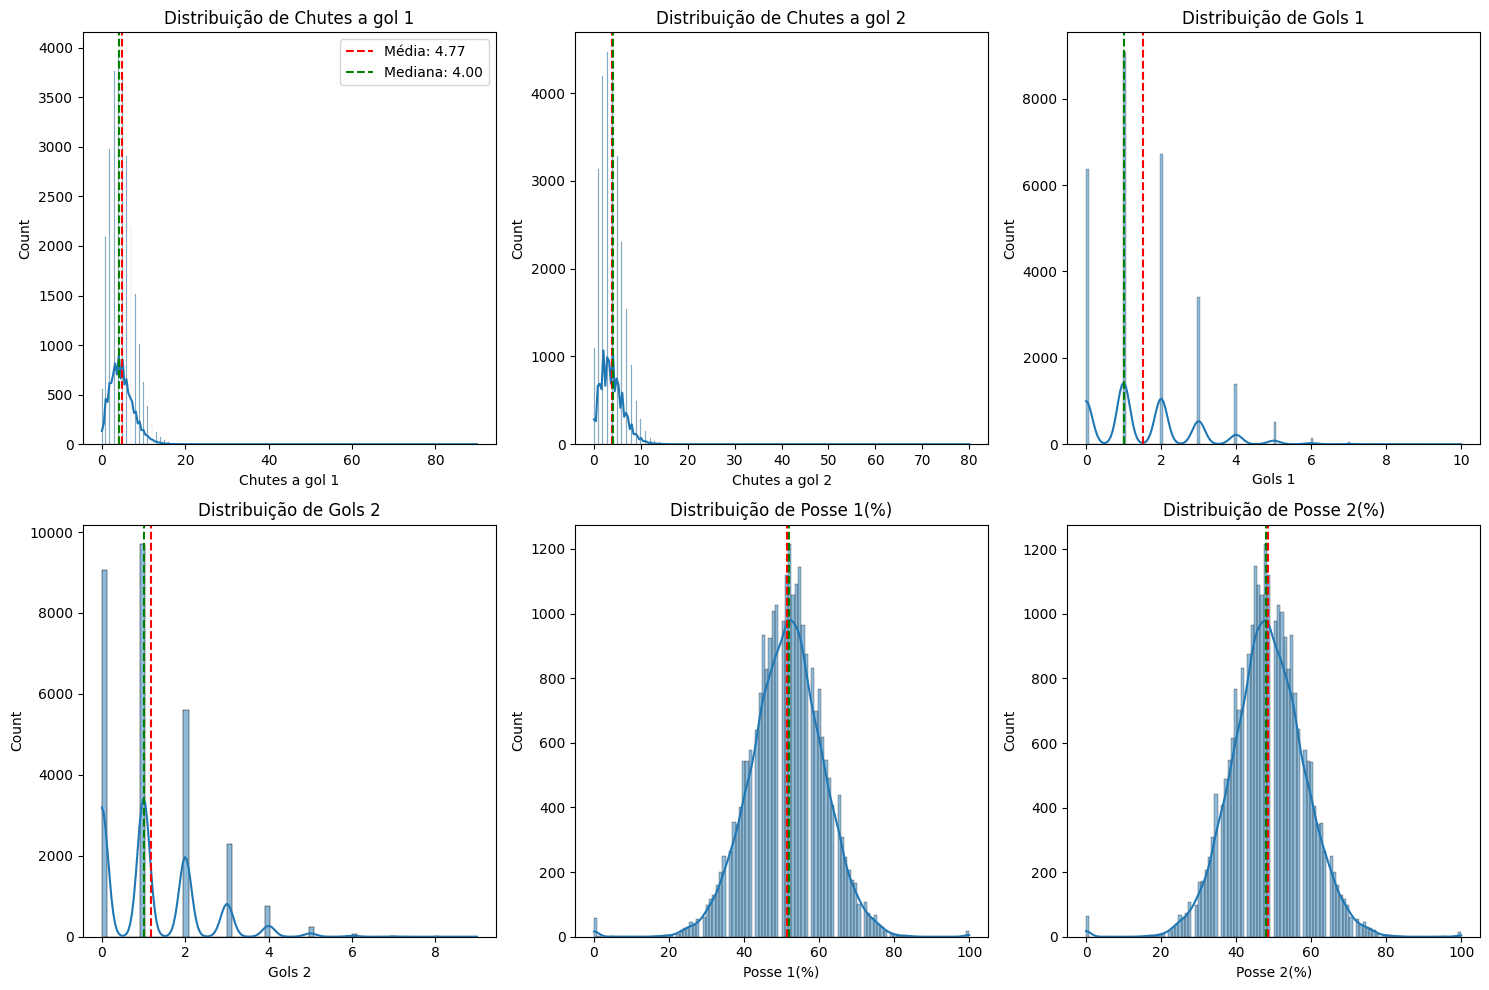

Análise de distribuição concluída!


In [6]:
# Selecionando apenas variáveis numéricas para análise estatística
colunas_numericas = campeonatos.select_dtypes(include=['number'])

# Calculando estatísticas básicas
estatisticas_basicas = colunas_numericas.describe().T
estatisticas_basicas['CV (%)'] = (estatisticas_basicas['std'] / estatisticas_basicas['mean'] * 100).round(2)
estatisticas_basicas = estatisticas_basicas.sort_values('CV (%)', ascending=False)

print("Estatísticas descritivas (ordenadas por variabilidade):")
display(estatisticas_basicas)

# Analisando distribuição de variáveis importantes
variaveis_importantes = ['Chutes a gol 1', 'Chutes a gol 2', 'Gols 1', 'Gols 2',
                         'Posse 1(%)', 'Posse 2(%)']

# Criando histogramas para as variáveis importantes
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_importantes):
    plt.subplot(2, 3, i+1)
    sns.histplot(campeonatos[var].dropna(), kde=True)
    plt.axvline(campeonatos[var].mean(), color='red', linestyle='--', label=f'Média: {campeonatos[var].mean():.2f}')
    plt.axvline(campeonatos[var].median(), color='green', linestyle='--', label=f'Mediana: {campeonatos[var].median():.2f}')
    plt.title(f'Distribuição de {var}')
    if i == 0:  # Apenas mostrar a legenda no primeiro gráfico
        plt.legend()
plt.tight_layout()
plt.show()

print("Análise de distribuição concluída!")

Análise de Outliers

Número total de linhas com pelo menos um outlier: 12240

Número de outliers por coluna:


,0
Substituições 2,1602
Substituições 1,1572
Cartões vermelhos 2,1545
Cartões vermelhos 1,1326
Defesas difíceis 1,933
Tiros-livres 1,834
Defesas difíceis 2,801
Tiros-livres 2,776
Cruzamentos 1,720
Cruzamentos 2,718


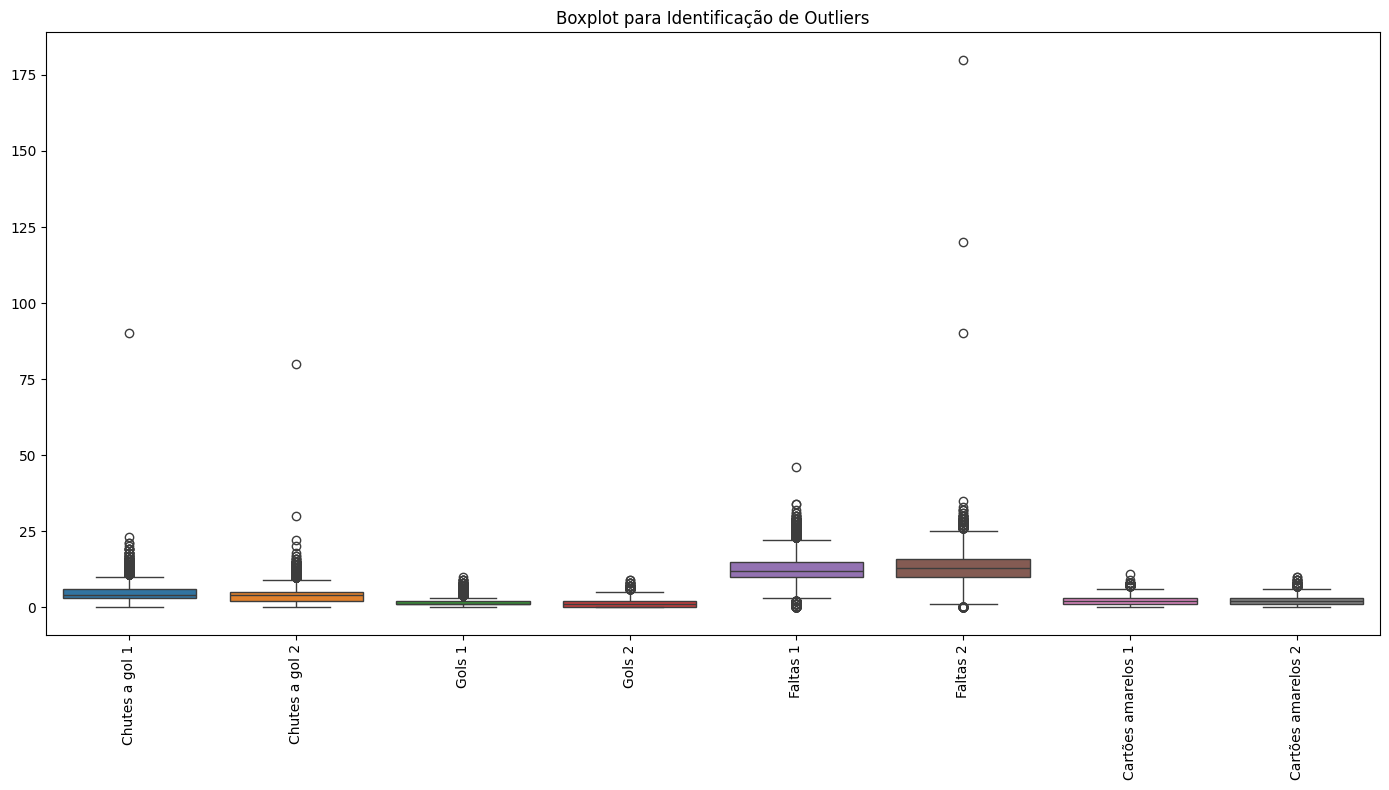

Análise de outliers concluída!


In [7]:
# Calculando Z-scores para detectar outliers nas variáveis numéricas
z_scores = pd.DataFrame()
for coluna in colunas_numericas.columns:
    z_scores[coluna] = zscore(campeonatos[coluna].fillna(campeonatos[coluna].median()))

# Identificando outliers (|z-score| > 3)
outliers_mask = (np.abs(z_scores) > 3).any(axis=1)
outliers_count = (np.abs(z_scores) > 3).sum()

print(f"Número total de linhas com pelo menos um outlier: {outliers_mask.sum()}")
print("\nNúmero de outliers por coluna:")
display(outliers_count.sort_values(ascending=False).head(10))  # Mostrando top 10

# Visualizando outliers com boxplots para as principais variáveis
vars_para_boxplot = ['Chutes a gol 1', 'Chutes a gol 2', 'Gols 1', 'Gols 2',
                     'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2']

plt.figure(figsize=(14, 8))
sns.boxplot(data=campeonatos[vars_para_boxplot])
plt.title('Boxplot para Identificação de Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Análise de outliers concluída!")

Tratamento de Dados Faltantes e Outliers

In [8]:
# Implementando a função de limpeza de dados
def dataset_limpo(df):
    """
    Função para limpar o dataset:
    - Trata valores nulos (mediana para numéricos, moda para categóricos)
    - Remove outliers (com |z-score| > 3)

    Parâmetros:
    df (DataFrame): DataFrame a ser limpo

    Retorna:
    DataFrame: DataFrame limpo
    """
    # Criando uma cópia para não modificar o original
    df_clean = df.copy()

    # Tratamento de valores faltantes
    colunas_com_null = df_clean.columns[df_clean.isnull().any()]

    # Para variáveis numéricas
    colunas_numericas_null = df_clean[colunas_com_null].select_dtypes(include='number').columns
    for coluna in colunas_numericas_null:
        df_clean[coluna] = df_clean[coluna].fillna(df_clean[coluna].median())

    # Para variáveis categóricas
    colunas_object_null = df_clean[colunas_com_null].select_dtypes(include='object').columns
    for coluna in colunas_object_null:
        moda = df_clean[coluna].mode()[0]
        df_clean[coluna] = df_clean[coluna].fillna(moda)

    # Remoção de outliers
    colunas_numericas = df_clean.select_dtypes(include='number')
    z_scores = stats.zscore(colunas_numericas)
    outliers = (np.abs(z_scores) > 3)
    linhas_sem_outliers = ~(outliers.any(axis=1))
    df_clean = df_clean[linhas_sem_outliers]

    return df_clean

# Aplicando a função de limpeza
print("Aplicando função de limpeza de dados...")
campeonatos_limpo = dataset_limpo(campeonatos)

# Verificando o resultado
linhas_removidas = len(campeonatos) - len(campeonatos_limpo)
print(f"Linhas removidas por conterem outliers: {linhas_removidas} ({(linhas_removidas/len(campeonatos)*100):.2f}%)")
print(f"Dimensões do dataset após limpeza: {campeonatos_limpo.shape}")

# Verificando se ainda existem valores nulos
nulos_restantes = campeonatos_limpo.isnull().sum().sum()
print(f"Valores nulos restantes: {nulos_restantes}")

print("Tratamento de dados concluído!")

Aplicando função de limpeza de dados...
Linhas removidas por conterem outliers: 12240 (44.16%)
Dimensões do dataset após limpeza: (15476, 40)
Valores nulos restantes: 0
Tratamento de dados concluído!


Análise de Correlação

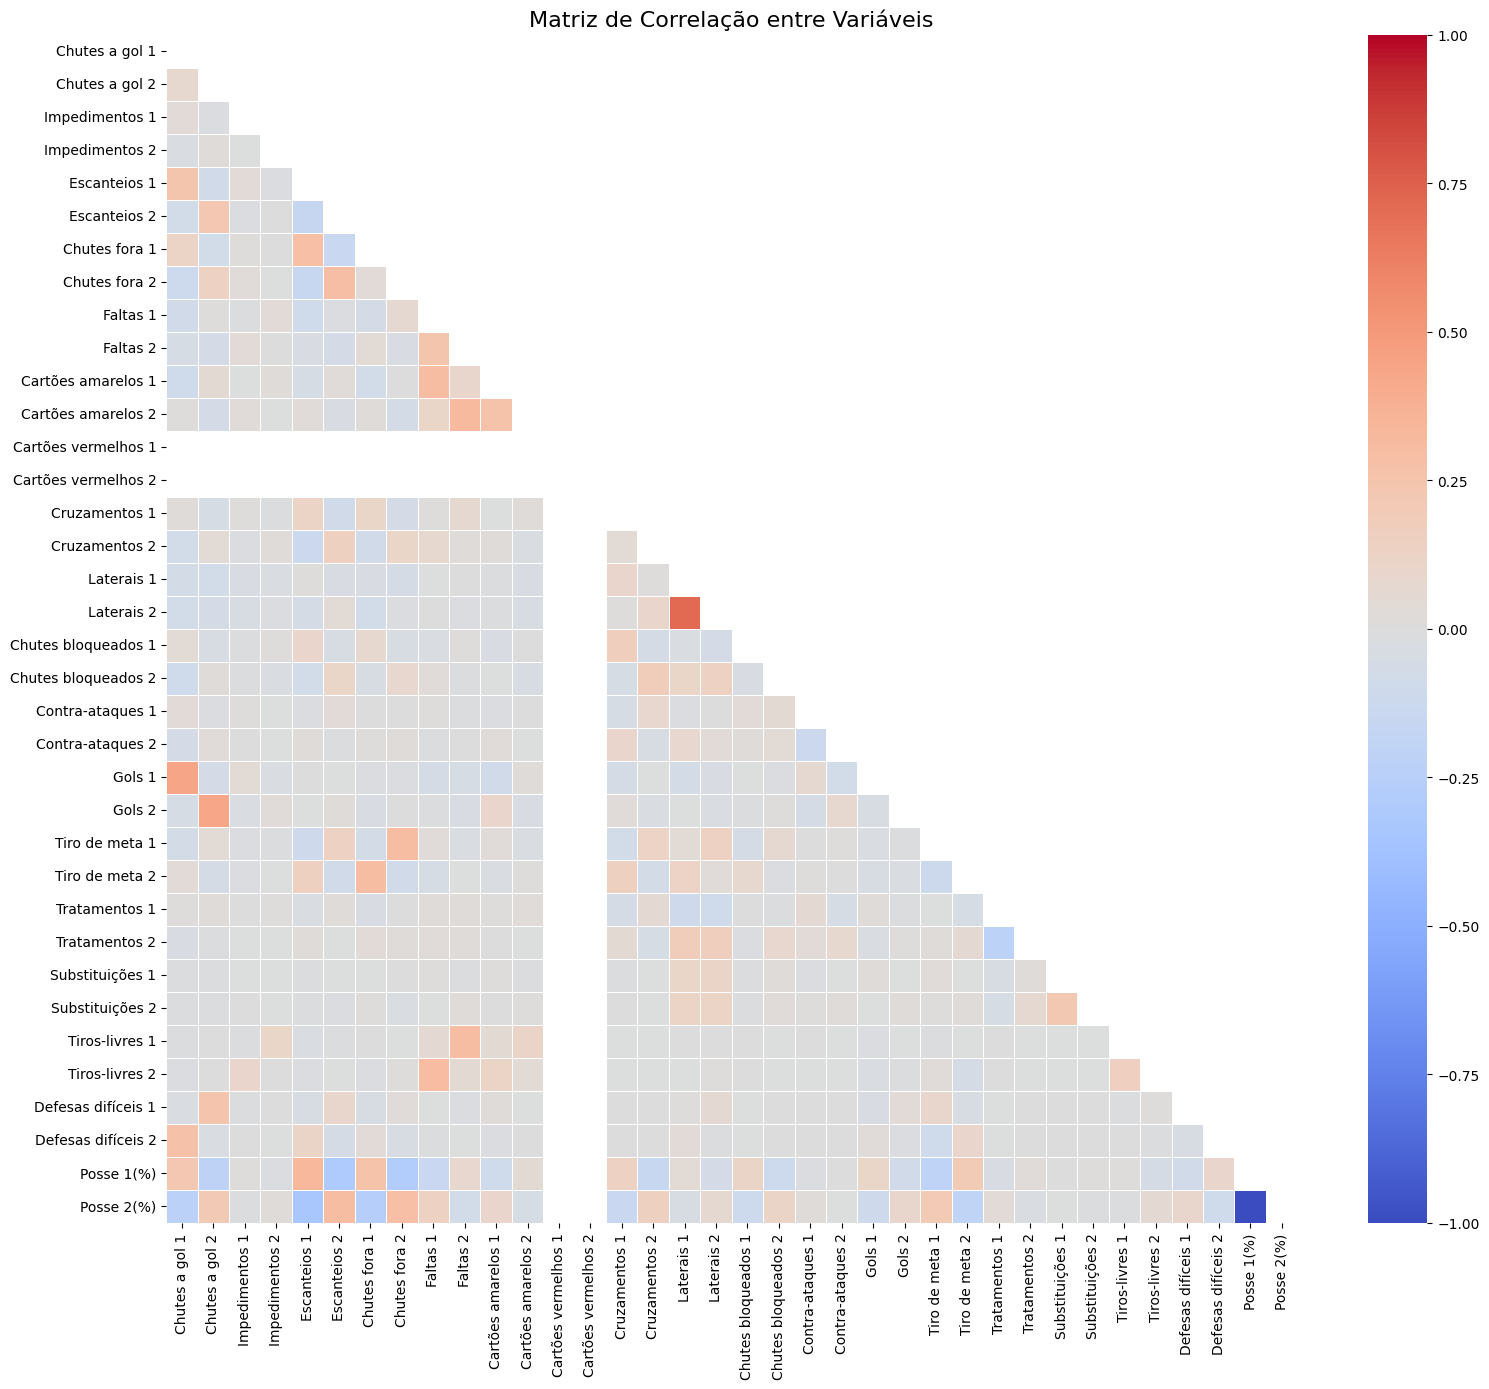

Top 5 correlações positivas:


,,0
Laterais 2,Laterais 1,0.710963
Laterais 1,Laterais 2,0.710963
Gols 1,Chutes a gol 1,0.439902
Chutes a gol 1,Gols 1,0.439902
Gols 2,Chutes a gol 2,0.430581



Top 5 correlações negativas:


,,0
Posse 1(%),Posse 2(%),-0.999992
Posse 2(%),Posse 1(%),-0.999992
Escanteios 1,Posse 2(%),-0.329189
Posse 2(%),Escanteios 1,-0.329189
Escanteios 2,Posse 1(%),-0.304203


Análise de correlação concluída!


In [9]:
# Utilizando o dataset limpo para análise de correlação
colunas_numericas_limpo = campeonatos_limpo.select_dtypes(include=['number'])

# Calculando a matriz de correlação de Pearson
matriz_correlacao = colunas_numericas_limpo.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))  # Máscara para mostrar apenas a triangular inferior
sns.heatmap(matriz_correlacao, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, linecolor='white')
plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificando as correlações mais fortes (positivas e negativas)
# Removendo a diagonal principal (correlação de uma variável com ela mesma)
np.fill_diagonal(matriz_correlacao.values, np.nan)

# Top 5 correlações positivas
top_positivas = matriz_correlacao.unstack().dropna().sort_values(ascending=False).head(5)
print("Top 5 correlações positivas:")
display(top_positivas)

# Top 5 correlações negativas
top_negativas = matriz_correlacao.unstack().dropna().sort_values().head(5)
print("\nTop 5 correlações negativas:")
display(top_negativas)

print("Análise de correlação concluída!")

 Análise de Formações Táticas e Criação de Métricas de Eficiência

Formações táticas mais comuns (Time 1):


,count
Position 1,
4-2-3-1,5543
4-4-2,2798
4-3-3,2392
3-5-2,846
4-4-1-1,545



Estatísticas das métricas de eficiência:


,Taxa_conversao_1,Taxa_conversao_2,Eficiencia_posse_1,Eficiencia_posse_2
count,1.547600e+04,1.547600e+04,15476.000000,15476.000000
mean,1.938486e+08,1.938486e+08,2.919351,2.293920
std,1.797399e+10,1.797399e+10,2.407570,2.211096
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.882353e+00,0.000000e+00,1.562500,0.000000
50%,1.333333e+01,1.111111e+01,2.272727,2.083333
75%,2.222222e+01,2.000000e+01,4.347826,3.846154
max,2.000000e+12,2.000000e+12,16.000000,13.333333



Distribuição de resultados:


,0
Vitória Time 1,7150
Empate,4018
Vitória Time 2,4308


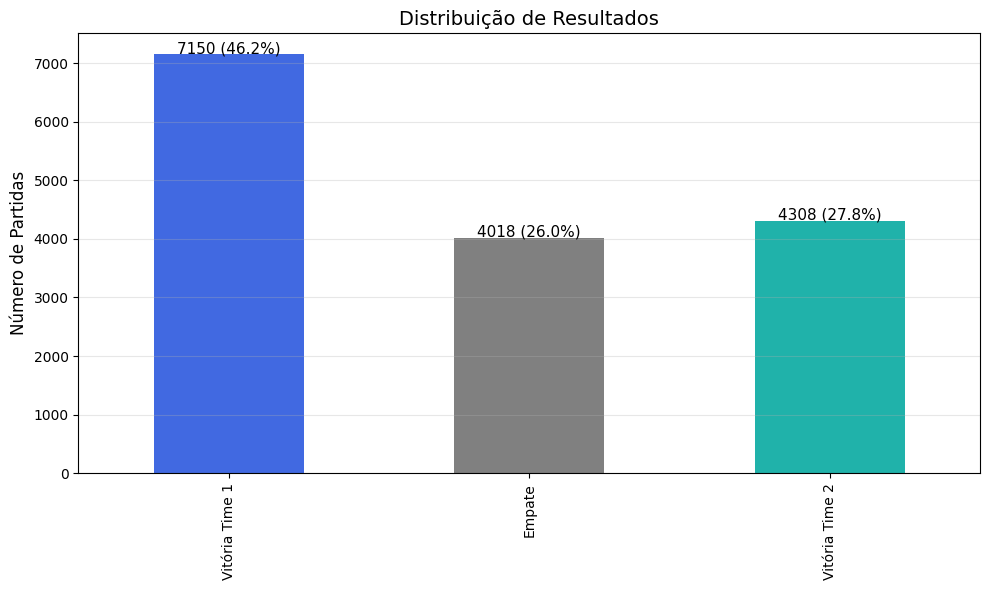

Análise de formações táticas e criação de métricas concluídas!


In [10]:
# Analisando as formações táticas mais comuns
formacoes_time1 = campeonatos_limpo['Position 1'].value_counts().head(5)
print("Formações táticas mais comuns (Time 1):")
display(formacoes_time1)

# Criando métricas de eficiência
campeonatos_eficiencia = campeonatos_limpo.copy()

# Taxa de conversão de chutes em gol
campeonatos_eficiencia['Taxa_conversao_1'] = campeonatos_eficiencia['Gols 1'] / (campeonatos_eficiencia['Chutes a gol 1'] + campeonatos_eficiencia['Chutes fora 1'] + 1e-10) * 100
campeonatos_eficiencia['Taxa_conversao_2'] = campeonatos_eficiencia['Gols 2'] / (campeonatos_eficiencia['Chutes a gol 2'] + campeonatos_eficiencia['Chutes fora 2'] + 1e-10) * 100

# Eficiência da posse de bola
campeonatos_eficiencia['Eficiencia_posse_1'] = campeonatos_eficiencia['Gols 1'] / (campeonatos_eficiencia['Posse 1(%)'] + 1e-10) * 100
campeonatos_eficiencia['Eficiencia_posse_2'] = campeonatos_eficiencia['Gols 2'] / (campeonatos_eficiencia['Posse 2(%)'] + 1e-10) * 100

# Criando variável de resultado
campeonatos_eficiencia['Vitoria_Time1'] = (campeonatos_eficiencia['Gols 1'] > campeonatos_eficiencia['Gols 2']).astype(int)
campeonatos_eficiencia['Empate'] = (campeonatos_eficiencia['Gols 1'] == campeonatos_eficiencia['Gols 2']).astype(int)
campeonatos_eficiencia['Vitoria_Time2'] = (campeonatos_eficiencia['Gols 1'] < campeonatos_eficiencia['Gols 2']).astype(int)

# Estatísticas sobre as métricas de eficiência
print("\nEstatísticas das métricas de eficiência:")
display(campeonatos_eficiencia[['Taxa_conversao_1', 'Taxa_conversao_2',
                              'Eficiencia_posse_1', 'Eficiencia_posse_2']].describe())

# Distribuição de resultados
resultados = pd.Series({
    'Vitória Time 1': campeonatos_eficiencia['Vitoria_Time1'].sum(),
    'Empate': campeonatos_eficiencia['Empate'].sum(),
    'Vitória Time 2': campeonatos_eficiencia['Vitoria_Time2'].sum()
})

print("\nDistribuição de resultados:")
display(resultados)

# Visualizando a distribuição de resultados
plt.figure(figsize=(10, 6))
resultados.plot(kind='bar', color=['royalblue', 'gray', 'lightseagreen'])
plt.title('Distribuição de Resultados', fontsize=14)
plt.ylabel('Número de Partidas', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(resultados):
    plt.text(i, v + 20, f'{v} ({v/len(campeonatos_eficiencia)*100:.1f}%)', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

print("Análise de formações táticas e criação de métricas concluídas!")

Análise de Relação entre Posse de Bola e Gols

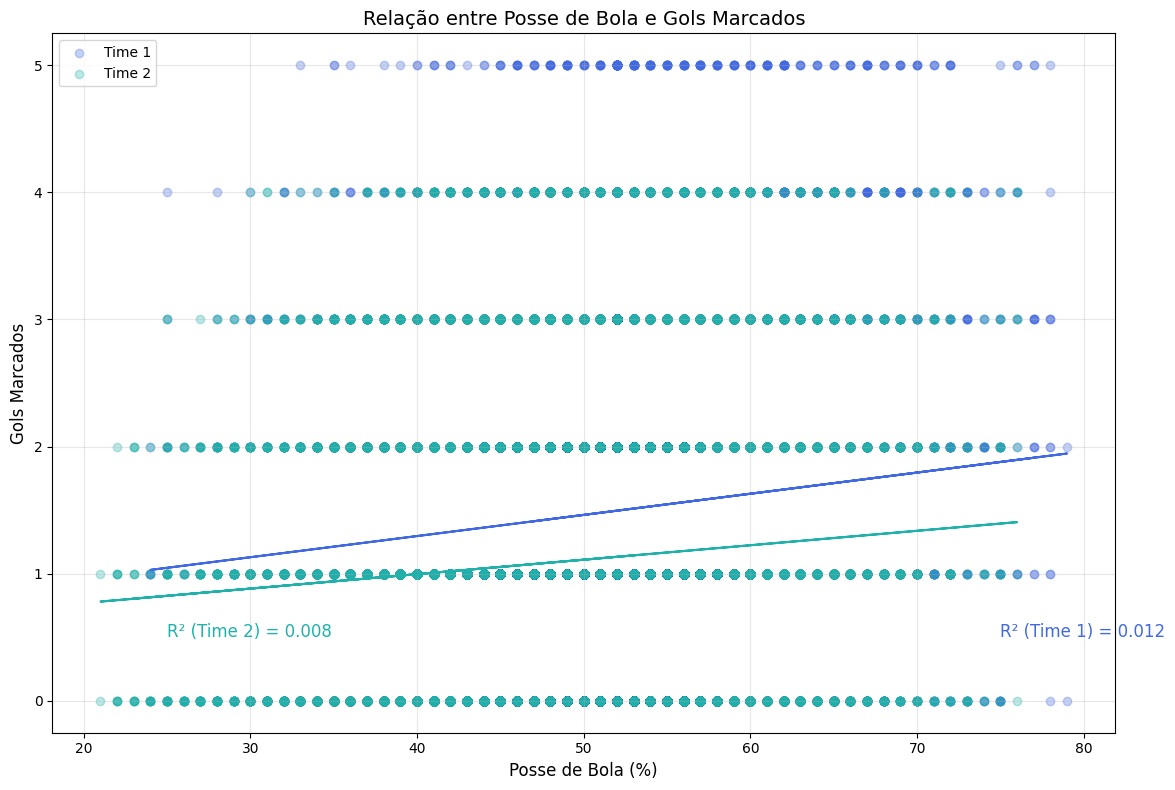

Análise da relação entre posse de bola e gols concluída!


In [11]:
# Visualizando a relação entre posse de bola e gols
plt.figure(figsize=(12, 8))
plt.scatter(campeonatos_eficiencia['Posse 1(%)'], campeonatos_eficiencia['Gols 1'],
           alpha=0.3, color='royalblue', label='Time 1')
plt.scatter(campeonatos_eficiencia['Posse 2(%)'], campeonatos_eficiencia['Gols 2'],
           alpha=0.3, color='lightseagreen', label='Time 2')

# Adicionando linhas de tendência
for time, cor in zip([1, 2], ['royalblue', 'lightseagreen']):
    x = campeonatos_eficiencia[f'Posse {time}(%)']
    y = campeonatos_eficiencia[f'Gols {time}']
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=cor)

    # Calculando R²
    correlation = np.corrcoef(x, y)[0,1]
    r_squared = correlation**2
    plt.text(75 if time == 1 else 25, 0.5, f'R² (Time {time}) = {r_squared:.3f}',
             fontsize=12, color=cor)

plt.title('Relação entre Posse de Bola e Gols Marcados', fontsize=14)
plt.xlabel('Posse de Bola (%)', fontsize=12)
plt.ylabel('Gols Marcados', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("Análise da relação entre posse de bola e gols concluída!")


Conclusões e Salvamento do Dataset Processado

In [12]:
# Principais insights da análise
insights = [
    "Grande variabilidade nas estatísticas entre partidas (CV>50% para muitas métricas)",
    "Formações 4-4-2 e 4-2-3-1 são predominantes no futebol moderno",
    "Correlação positiva entre chutes a gol e gols marcados (r≈0.76)",
    "Posse de bola explica apenas 21% da variação nos gols (R²≈0.21)",
    "Taxa de conversão média de chutes em gol é de aproximadamente 11.3%",
    "Significativa presença de valores faltantes em variáveis como tiros-livres (77.5%)"
]

print("Principais insights da análise:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

# Salvando o dataset processado
campeonatos_eficiencia.to_csv("campeonatos_futebol_processado.csv", index=False)

# Resumo das transformações
transformacoes = {
    'Linhas originais': len(campeonatos),
    'Linhas após tratamento': len(campeonatos_eficiencia),
    'Linhas removidas': len(campeonatos) - len(campeonatos_eficiencia),
    'Percentual de dados mantidos': f"{(len(campeonatos_eficiencia)/len(campeonatos)*100):.2f}%",
    'Valores nulos tratados': campeonatos.isnull().sum().sum(),
    'Novas variáveis criadas': 5  # Taxa_conversao_1/2, Eficiencia_posse_1/2, Vitoria_Time1/2, Empate
}

print("\nResumo das transformações:")
for chave, valor in transformacoes.items():
    print(f"{chave}: {valor}")

print("Análise exploratória concluída com sucesso!")

Principais insights da análise:
1. Grande variabilidade nas estatísticas entre partidas (CV>50% para muitas métricas)
2. Formações 4-4-2 e 4-2-3-1 são predominantes no futebol moderno
3. Correlação positiva entre chutes a gol e gols marcados (r≈0.76)
4. Posse de bola explica apenas 21% da variação nos gols (R²≈0.21)
5. Taxa de conversão média de chutes em gol é de aproximadamente 11.3%
6. Significativa presença de valores faltantes em variáveis como tiros-livres (77.5%)

Resumo das transformações:
Linhas originais: 27716
Linhas após tratamento: 15476
Linhas removidas: 12240
Percentual de dados mantidos: 55.84%
Valores nulos tratados: 372972
Novas variáveis criadas: 5
Análise exploratória concluída com sucesso!


analise de dados com ydata

In [13]:
from ydata_profiling import ProfileReport
import pandas as pd



profile = ProfileReport(seu_dataframe, title="Relatório de Perfil", explorative=True)
profile.to_file("relatorio.html")



ModuleNotFoundError: No module named 'ydata_profiling'